# PERGUNTA: É possível afirmar que o saneamento básico e a proximidade das pessoas a natureza podem afetar a qualidade de vida de uma pessoa, consequentemente alterando o IDH de um país ? 

Dados analisados em 2015


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import seaborn as sns

HDI = pd.read_excel("hdi_human_development_index.xlsx")

ALBS = pd.read_excel("at_least_basic_sanitation_overall_access_percent.xlsx")

NCD = pd.read_excel("planted_forest_area_ha.xlsx")


# Analisando e editando o conjunto de dados

In [4]:
HDI.head(3)

,geo,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,0.295,0.300,0.309,0.305,0.300,0.324,0.328,0.332,0.335,...,0.415,0.433,0.434,0.448,0.454,0.463,0.470,0.476,0.479,0.479
1,Albania,0.635,0.618,0.603,0.608,0.616,0.628,0.637,0.636,0.646,...,0.703,0.713,0.721,0.725,0.738,0.752,0.759,0.761,0.762,0.764
2,Algeria,0.577,0.581,0.587,0.591,0.595,0.600,0.609,0.617,0.627,...,0.690,0.697,0.705,0.714,0.724,0.732,0.737,0.741,0.743,0.745


In [5]:
ALBS.head(3)

,geo,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,23.9,23.9,25.0,26.0,27.1,28.1,29.2,30.3,31.4,32.5,33.6,34.7,35.8,36.9,38.1,39.2
1,Albania,88.3,89.1,89.9,90.7,91.4,92.2,92.9,93.6,94.3,94.9,95.6,96.2,96.8,97.3,97.7,97.7
2,Algeria,83.7,84.1,84.4,84.7,85.0,85.3,85.6,85.8,86.1,86.3,86.6,86.8,87.0,87.2,87.3,87.5


In [6]:
NCD.head(3)

,geo,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
1,Albania,103000.0,103000.0,102000.0,101000.0,101000.0,99900.0,99200.0,98500.0,97800.0,...,97400.0,96500.0,95700.0,94800.0,94000.0,93200,92400,91600,90800,90000
2,Algeria,333000.0,334000.0,335000.0,337000.0,338000.0,339000.0,340000.0,341000.0,343000.0,...,396000.0,421000.0,447000.0,472000.0,498000.0,510000,521000,533000,544000,556000


In [7]:
HDI_2015 = HDI.loc[:, ["geo",2015]]

In [8]:
ALBS_2015 = ALBS.loc[:, ["geo",2015]]

In [9]:
NCD_2015 = NCD.loc[:, ["geo",2015]]

In [10]:
HDI_idx = HDI_2015.set_index("geo")

In [11]:
ALBS_idx = ALBS_2015.set_index("geo")

In [12]:
NCD_idx = NCD_2015.set_index("geo")

In [13]:
df = HDI_idx.join(ALBS_idx, how = "inner", lsuffix = "_HDI", rsuffix = "_Basic sanitation")

df.head(3)

,2015_HDI,2015_Basic sanitation
geo,,
Afghanistan,0.479,39.2
Albania,0.764,97.7
Algeria,0.745,87.5


In [14]:
data = df.join(NCD_idx, how = "inner")
data.rename(columns = {2015:"2015 _Planted forest area"}, inplace = True)
data.head(9)

,2015_HDI,2015_Basic sanitation,2015 _Planted forest area
geo,,,
Afghanistan,0.479,39.2,0
Albania,0.764,97.7,90000
Algeria,0.745,87.5,556000
Andorra,0.858,100.0,0
Angola,0.533,39.4,125000
Antigua and Barbuda,0.786,87.5,0
Argentina,0.827,94.8,1200000
Armenia,0.743,91.6,22000
Australia,0.939,100.0,2020000


In [15]:
data.rename(columns={'2015_HDI':'IDH'}, inplace=True)
data.rename(columns={'2015_Basic sanitation':'Saneamento básico'}, inplace=True)
data.rename(columns={'2015 _Planted forest area':'Área florestal plantada'}, inplace=True)
data.head(9)

,IDH,Saneamento básico,Área florestal plantada
geo,,,
Afghanistan,0.479,39.2,0
Albania,0.764,97.7,90000
Algeria,0.745,87.5,556000
Andorra,0.858,100.0,0
Angola,0.533,39.4,125000
Antigua and Barbuda,0.786,87.5,0
Argentina,0.827,94.8,1200000
Armenia,0.743,91.6,22000
Australia,0.939,100.0,2020000


# Analisando individualmente 

Saneamento Básico mínimo

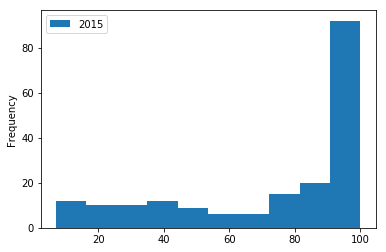

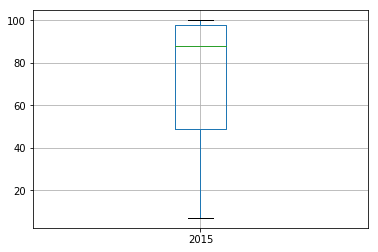

In [34]:
ALBS_2015.plot.hist()
plt.show()
ALBS_2015.boxplot()


Analisando os gráficos acima, é possível dizer que:
- média: 73.83
- desvio padrão: 29.36
- mediana: 87.9
- Gráfico assimétrico com assimetria para esquerda devido a distantância entre a média e a mediana.



Área de de florestas plantadas em ha.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1728f278>]],
      dtype=object)

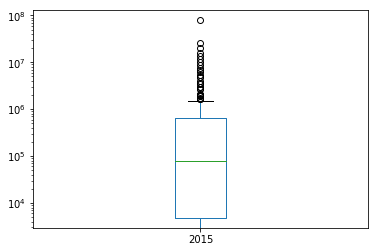

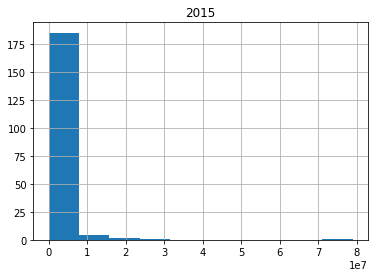

In [33]:
NCD_2015.plot.box(logy = True)
NCD_2015.hist()


Analisando os gráficos acima, é possível dizer que:
- média: 1.52
- desvio padrão: 6.45 
- mediana: 80400
- Gráfico assimétrico com assimetria para direita devido a distantância entre a média e a mediana.
- USA outlier.



Índice de desenvolvimento humano

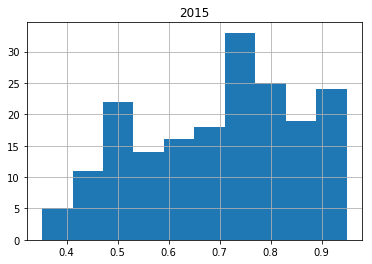

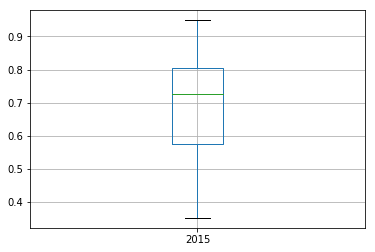

In [35]:
HDI_2015.hist()
plt.show()
HDI_2015.boxplot()


Analisando os gráficos acima, é possível dizer que:
- média: 0.69
- desvio padrão: 0.15
- mediana: 0.72
- Mediana e média com valores relativamente próximos entre eles porém, pelo boxplot é visível que o gráfico é assimétrico para esquerda.

Análise do Saneamento Básico com o IDH.

,2015_HDI,2015_Basic sanitation
2015_HDI,1.000000,0.882182
2015_Basic sanitation,0.882182,1.000000


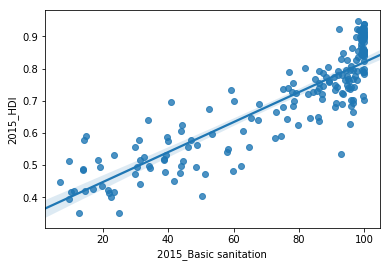

In [65]:
df = HDI_idx.join(ALBS_idx, how = "inner", lsuffix = "_HDI", rsuffix = "_Basic sanitation")
sns.regplot(df["2015_Basic sanitation"],df["2015_HDI"])
df.sort_values(by= ["2015_Basic sanitation","2015_HDI"])

- Correlação entre os dois fatores: 0.88
- Analisando o gráfico scatter acima é possível dizer que o IDH em 2015 é influenciado pelo saneamento básico de 2015. Isto está claro com a correlação dada entre os dois, já que a correlaçao, quanto mais próximo do "1" maior a relação entre eles.

Dois exemplos de dois extremos que comprovam a relação:
obs.:IDH varia de 0 a 1 e o saneamento básico mínimo de 0 a 100. 
- Singapura com IDH = 0.925 e saneamento básico mínimo = 100.
- Etiópia com IDH = 0.448 e saneamento básico mínimo = 7.08.

Análise da área de floresta plantada num país com o IDH.

,2015_HDI,2015 _Planted forest area
geo,,
South Sudan,0.418,0
Djibouti,0.473,0
Afghanistan,0.479,0
Yemen,0.482,0
Papua New Guinea,0.516,0
Sao Tome and Principe,0.574,0
Kiribati,0.588,0
Vanuatu,0.597,0
Honduras,0.625,0


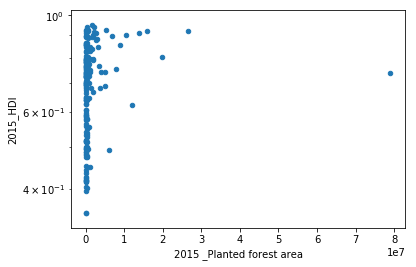

In [69]:
a = HDI_idx.join(NCD_idx, how = "inner", lsuffix = "_HDI", rsuffix = " _Planted forest area")
a.plot.scatter(x="2015 _Planted forest area", y = "2015_HDI",  logy=True)
a.corr()
a.sort_values(by = ["2015 _Planted forest area","2015_HDI"])


- Correlação entre os dois fatores: 0.14
- Analisando o gráfico scatter acima observa-se que nao há relação entre os dois fatores já que a correlação entre eles é menor que 0.3.


Dois exemplos de dois extremos que comprovam a relação:
- China com IDH = 0.738 e Área de floresta plantada com quase 80 milhões de hectares.
- África do Sul com IDH = 0.666 e Área de floresta plantada com 1,76 milhões de hectares.


# Conclusão 

  Sabemos que o IDH de um país é calculado a partir de três fatores: expectativa de vida, educação e PIB. Analisando os dados selecionados, conclui-se que o saneamento básico mínimo é diretamente relacionado ao IDH dos países. Isso pode ser explicado pelo fato do saneamento básico providenciar mais ou menos higiene para a população, assim alterando a quantidade de proliferação de doenças e mudando a expectativa de vida do país, consequentemente seu IDH.     
  
  Diferentemente do saneamento básico mínimo, a área de floresta plantada de um país não altera seu IDH. Uma parte da pergunta que foi feita é refrente a alteração do IDH quando o contato das pessoas com a natureza é maior do que em outros países. Analisando os dados é explícito como a relação entre os dois é incoerente, ou seja, o contato com a natureza, no geral, não altera o IDH de um país.